**Importing Important Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)#because we want to see all the columns.

**Reading the Dataset**

In [3]:
dataset=pd.read_csv('train.csv')
print(dataset.shape)

(31527, 11)


In [4]:
dataset.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.4
1,1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [5]:
dataset.describe()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
count,31527.000000,31512.000000,31521.000000,31507.000000,31519.000000,3.151300e+04,31508.000000,31500.000000,31515.000000,31502.000000
mean,16195.784217,2014.516692,6.451001,15.413083,11.288429,2.095628e+03,14.356532,1010.799183,0.071744,1.696949
std,9514.606331,1.105108,3.326838,33.139925,37.127145,3.575087e+05,11.296366,38.874431,0.949720,1.338706
min,0.000000,2013.000000,-37.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,-5646.000000,0.000000,-79.000000
25%,7888.500000,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,1002.700000,0.000000,0.900000
50%,16279.000000,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,1010.300000,0.000000,1.400000
75%,24371.500000,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,1019.000000,0.000000,2.200000
max,35054.000000,2017.000000,12.000000,31.000000,23.000000,6.346466e+07,40.500000,1042.000000,72.500000,11.200000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  float64
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  float64
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [7]:
dataset.nunique()

Unnamed: 0        31521
year                  5
month                13
day                  32
hour                 25
PM2.5               525
temperature         716
pressure            565
rain                124
wind_direction       16
wind_speed           92
dtype: int64

**In Data Analysis we will Analyze to find out the below stuff:**

**1)Missing values**

**2)All the Numerical Variables**

**3)Distributuion of the numerical variables**

**4)Categorical Variables**

**5)Cardinality of Categorical Variables**

**6)Outliers**

**7)Relationship between independent and dependent feature(SalePrice)**

**MISSING VALUES**

In [8]:
feature_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in feature_with_na: print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

year 0.0005 % missing values
month 0.0002 % missing values
day 0.0006 % missing values
hour 0.0003 % missing values
PM2.5 0.0004 % missing values
temperature 0.0006 % missing values
pressure 0.0009 % missing values
rain 0.0004 % missing values
wind_direction 0.0019 % missing values
wind_speed 0.0008 % missing values


**Since there are many missing values we need to find the relation between the missing values and PM2.5**

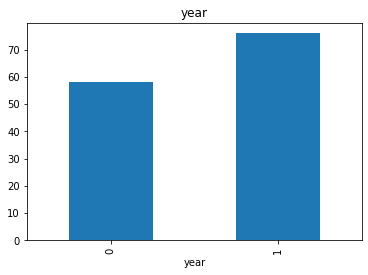

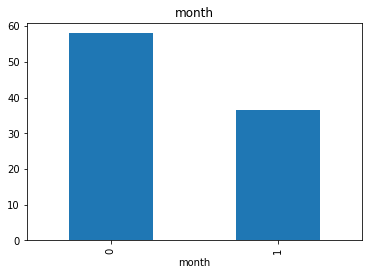

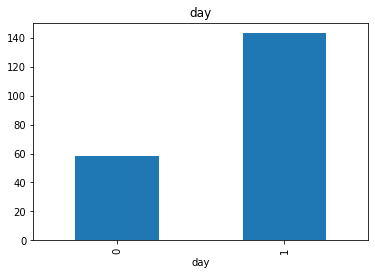

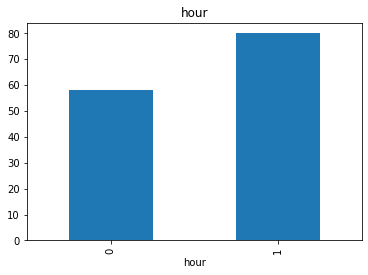

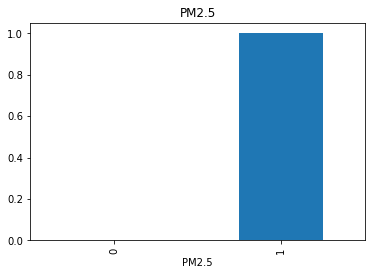

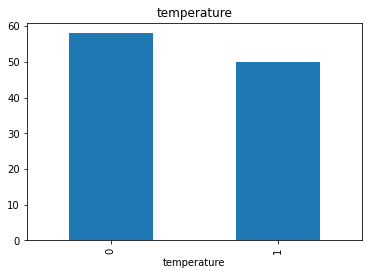

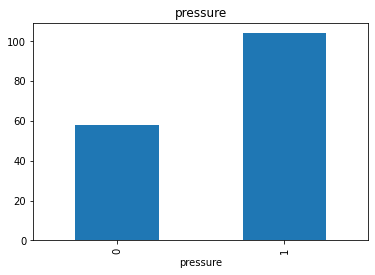

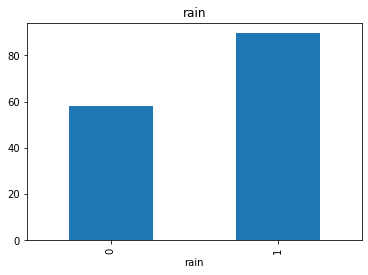

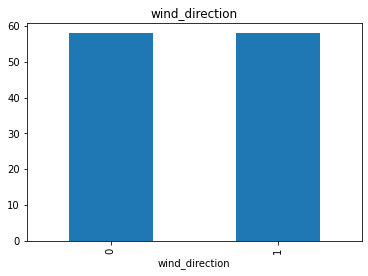

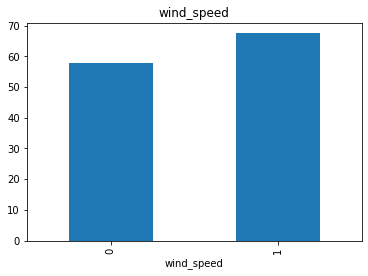

In [9]:
for feature in feature_with_na:
    data=dataset.copy()

    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['PM2.5'].median().plot.bar()
    plt.title(feature)
    plt.show()

**Here with the relation between the missing values and dependent variables is clearly visible. So we need to replace these nan values with something meaningful which we will do in the feature engineering section.**

In [10]:
dataset.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

In [11]:
dataset

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.4
1,1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,35035,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


In [12]:
dataset['pressure'] = dataset['pressure'].astype(float)#to conver the string values to float, and converting pressure to a numerical value

In [13]:
dataset

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.4
1,1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,35035,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


In [14]:
dataset['wind_direction']=dataset['wind_direction'].fillna(dataset['wind_direction'].mode()[0])

In [15]:
dataset.fillna(dataset.mean(),inplace=True)

C:\Users\RAVIKU~1\AppData\Local\Temp/ipykernel_6208/8220036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(),inplace=True)


In [16]:
dataset.isnull().sum()

Unnamed: 0        0
year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64

**##Unnamed: 0 has no relation with the prediction of PM2.5, so we can remove it##**

In [17]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

##**As we have dealt with missing values,now we can detect outliers and remove them so they did not affect our prediction values**##

**OUTLIERS**

In [18]:
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.400000
1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,1.696949
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.600000
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.100000
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.000000
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.800000
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.900000
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.000000
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.900000


In [19]:
min_threshold,max_threshold=dataset.year.quantile([0.001,0.999])
min_threshold,max_threshold

(2013.0, 2017.0)

In [20]:
dataset[dataset.year<min_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [21]:
dataset[dataset.year>max_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [22]:
dataset[dataset.year<min_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [23]:
dataset=dataset[(dataset.year>=min_threshold) & (dataset.year<=max_threshold)]

In [24]:
dataset.shape

(31527, 10)

In [25]:
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.400000
1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,1.696949
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.600000
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.100000
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.000000
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.800000
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.900000
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.000000
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.900000


In [26]:
minm_threshold,maxm_threshold=dataset.month.quantile([0.001,0.999])
minm_threshold,maxm_threshold

(1.0, 12.0)

In [27]:
dataset[dataset.month<minm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,-37.0,1.0,0.0,4.0,-0.7,1023.0,0.0,NNW,4.400000
1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,1.696949


In [28]:
dataset[dataset.month>maxm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [29]:
dataset=dataset[(dataset.month>=minm_threshold) & (dataset.month<=maxm_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [30]:
minm_threshold,maxm_threshold=dataset.day.quantile([0.001,0.999])
minm_threshold,maxm_threshold

(1.0, 31.0)

In [31]:
dataset[dataset.day<minm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24455,2016.0,1.0,-5656.0,12.0,91.0,3.0,1016.1,0.0,WNW,2.5


In [32]:
dataset[dataset.day>maxm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [33]:
dataset=dataset[(dataset.day>=minm_threshold) & (dataset.day<=maxm_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [34]:
minm_threshold,maxm_threshold=dataset.hour.quantile([0.001,0.999])
minm_threshold,maxm_threshold

(0.0, 23.0)

In [35]:
dataset[dataset.hour<minm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24391,2016.0,1.0,11.0,-6464.0,15.0,-4.7,1031.2,0.0,NW,3.4


In [36]:
dataset[dataset.hour>maxm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [37]:
dataset=dataset[(dataset.hour>=minm_threshold) & (dataset.hour<=maxm_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [38]:
minm_threshold,maxm_threshold=dataset.temperature.quantile([0.001,0.999])
minm_threshold,maxm_threshold

(-14.0, 36.64780000000028)

In [39]:
dataset[dataset.temperature<minm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24567,2016.0,1.0,19.0,5.0,17.0,-14.4,1025.8,0.0,NE,1.0
24568,2016.0,1.0,19.0,6.0,20.0,-14.4,1026.4,0.0,ENE,1.1
24569,2016.0,1.0,19.0,7.0,15.0,-15.1,1026.9,0.0,ENE,1.4
24570,2016.0,1.0,19.0,8.0,15.0,-15.2,1027.5,0.0,ESE,0.7
24658,2016.0,1.0,23.0,0.0,15.0,-14.4,1040.8,0.0,ENE,1.7
24660,2016.0,1.0,23.0,2.0,16.0,-14.2,1039.4,0.0,ENE,2.2
24661,2016.0,1.0,23.0,3.0,11.0,-14.1,1039.0,0.0,NE,1.6
24662,2016.0,1.0,23.0,5.0,10.0,-14.8,1038.5,0.0,N,4.1
24663,2016.0,1.0,23.0,6.0,5.0,-15.6,1038.6,0.0,NNW,4.0
24664,2016.0,1.0,23.0,7.0,6.0,-16.3,1039.5,0.0,NNE,2.9


In [40]:
dataset[dataset.temperature>maxm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2985,2013.0,7.0,3.0,14.0,25.0,36.8,989.3,0.0,W,1.2
2986,2013.0,7.0,3.0,15.0,28.0,36.7,989.5,0.0,NNW,1.5
3009,2013.0,7.0,4.0,14.0,22.0,37.2,986.3,0.0,WSW,1.0
3487,2013.0,7.0,24.0,12.0,14.0,37.1,994.0,0.0,N,2.1
3488,2013.0,7.0,24.0,13.0,10.0,37.6,993.5,0.0,N,3.0
3489,2013.0,7.0,24.0,14.0,12.0,37.9,993.5,0.0,N,2.0
3490,2013.0,7.0,24.0,15.0,8.0,37.4,993.5,0.0,NNW,2.0
3491,2013.0,7.0,24.0,16.0,13.0,37.6,993.3,0.0,WNW,1.3
3492,2013.0,7.0,24.0,17.0,13.0,36.9,993.1,0.0,WNW,1.5
3586,2013.0,7.0,28.0,15.0,52.0,37.1,993.5,0.0,WSW,1.8


In [41]:
dataset=dataset[(dataset.temperature>=minm_threshold) & (dataset.temperature<=maxm_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [42]:
minm_threshold,maxm_threshold=dataset['PM2.5'].quantile([0.0001,0.9999])
minm_threshold,maxm_threshold

(3.0, 2095.627909116872)

In [43]:
dataset[dataset['PM2.5']<minm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [44]:
dataset[dataset['PM2.5']>maxm_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
834,2013.0,4.0,4.0,18.0,63464664.0,5.7,1008.5,1.3,NNE,1.9


In [45]:
dataset=dataset[(dataset['PM2.5']>=minm_threshold) & (dataset['PM2.5']<=maxm_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [46]:
min_threshold,max_threshold=dataset.pressure.quantile([0.001,0.9999])
min_threshold,max_threshold

(988.8, 1041.2)

In [47]:
dataset[dataset['pressure']<min_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1715,2013.0,5.0,11.0,12.0,82.0,32.1,988.3,0.0,WNW,3.8
1716,2013.0,5.0,11.0,13.0,25.0,32.8,988.1,0.0,N,3.7
1717,2013.0,5.0,11.0,14.0,9.0,32.7,988.0,0.0,WNW,3.9
1718,2013.0,5.0,11.0,15.0,15.0,33.0,988.0,0.0,NW,3.4
1719,2013.0,5.0,11.0,16.0,21.0,32.7,988.0,0.0,N,2.0
1720,2013.0,5.0,11.0,17.0,17.0,31.9,988.1,0.0,NNW,4.0
2819,2013.0,6.0,26.0,16.0,121.0,31.2,988.7,0.0,SSW,2.3
2988,2013.0,7.0,3.0,17.0,10.0,32.9,988.7,0.0,NNW,0.1
3004,2013.0,7.0,4.0,9.0,21.0,31.8,988.6,0.0,NNE,1.6
3006,2013.0,7.0,4.0,11.0,19.0,34.6,988.7,0.0,NE,2.6


In [48]:
dataset[dataset['pressure']>max_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24654,2016.0,1.0,22.0,20.0,7.0,-12.6,1041.8,0.0,NNE,2.8
24655,2016.0,1.0,22.0,21.0,7.0,-12.6,1042.0,0.0,NNW,2.7
24656,2016.0,1.0,22.0,22.0,9.0,-13.1,1041.6,0.0,NNE,1.7


In [49]:
dataset=dataset[(dataset['pressure']>=min_threshold) & (dataset['pressure']<=max_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


In [50]:
min_threshold,max_threshold=dataset.rain.quantile([0.001,0.9999])
min_threshold,max_threshold

(0.0, 36.186169999988486)

In [51]:
dataset[dataset['rain']<min_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed


In [52]:
dataset[dataset['rain']>max_threshold]

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
3922,2013.0,8.0,11.0,15.0,209.0,23.5,1000.4,72.5,NNE,3.9
11241,2014.0,6.0,17.0,3.0,130.0,18.4,997.6,40.7,ESE,0.2
20668,2015.0,8.0,7.0,20.0,12.0,19.7,1010.5,36.6,ENE,1.4
29928,2016.0,9.0,11.0,3.0,75.0,19.7,1008.3,46.4,E,3.4


In [53]:
dataset=dataset[(dataset['rain']>=min_threshold) & (dataset['rain']<=max_threshold)]
dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.000000,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.000000,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.000000,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.000000,9.0,8.6,1016.0,0.0,NNE,0.9


**As now we have dealt with outliers, now we can analyse our Numerical and Categorical variables**

**NUMERICAL AND CATEGORICAL VARIABLES**

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31424 entries, 2 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31424 non-null  float64
 1   month           31424 non-null  float64
 2   day             31424 non-null  float64
 3   hour            31424 non-null  float64
 4   PM2.5           31424 non-null  float64
 5   temperature     31424 non-null  float64
 6   pressure        31424 non-null  float64
 7   rain            31424 non-null  float64
 8   wind_direction  31424 non-null  object 
 9   wind_speed      31424 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.6+ MB


In [55]:
dataset.head()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,N,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,N,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,NNE,2.5


In [56]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  9


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,2.5


In [57]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [58]:
discrete_feature

['year', 'month']

In [59]:
dataset[discrete_feature].head()

,year,month
2,2013.0,3.0
3,2013.0,3.0
4,2013.0,3.0
5,2013.0,3.0
6,2013.0,3.0


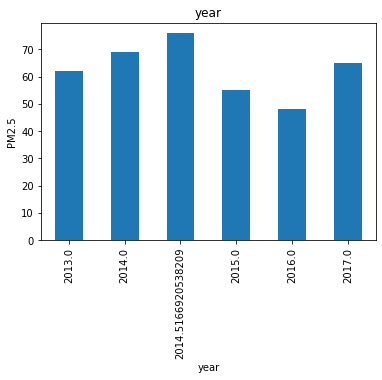

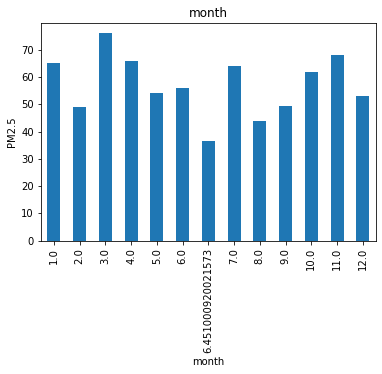

In [60]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['PM2.5'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PM2.5')
    plt.title(feature)
    plt.show()

In [61]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


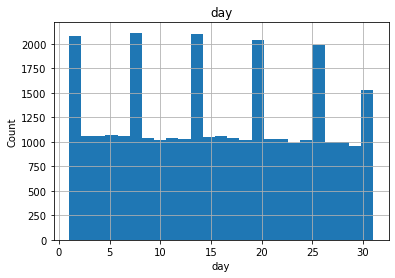

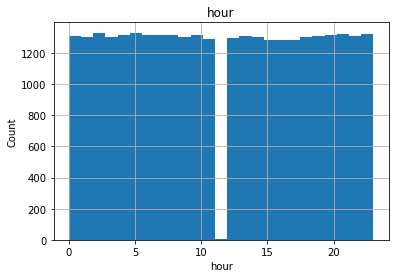

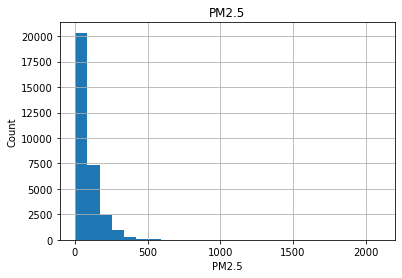

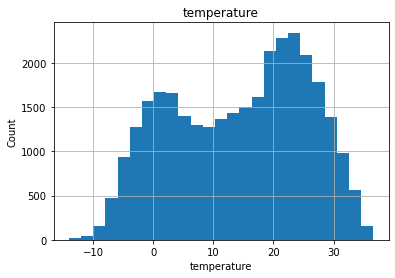

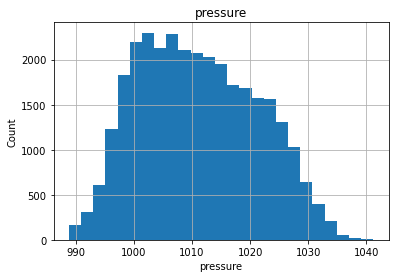

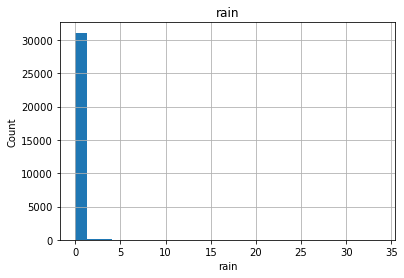

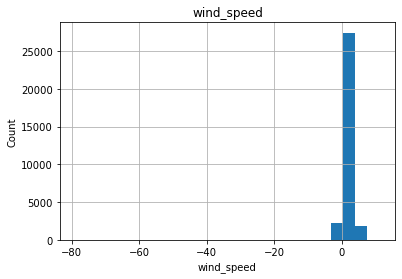

In [62]:

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

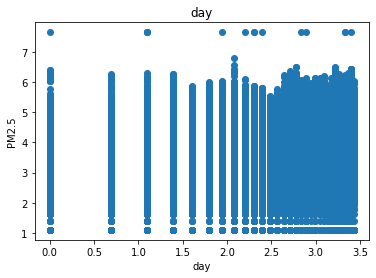

c:\Users\Ravi Kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


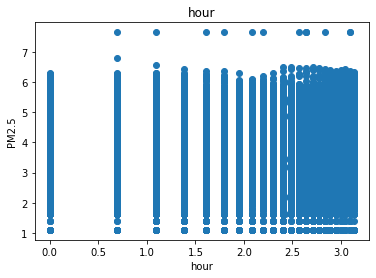

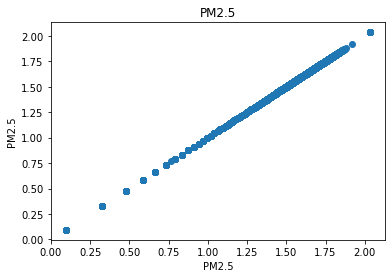

c:\Users\Ravi Kumar\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


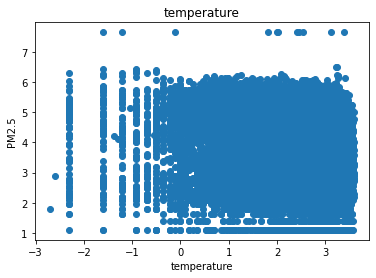

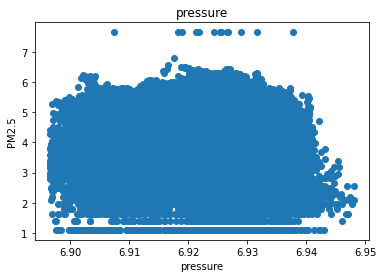

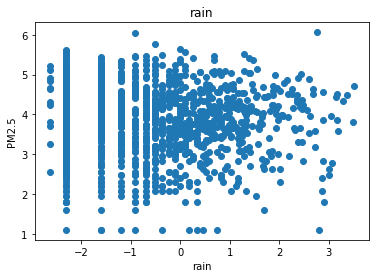

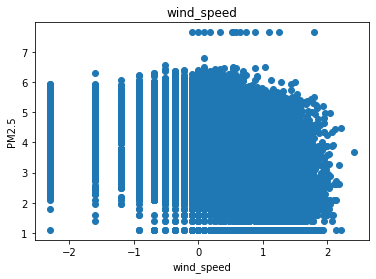

In [63]:
for feature in continuous_feature:
        data=dataset.copy()
    
        data[feature]=np.log(data[feature])
        data['PM2.5']=np.log(data['PM2.5'])
        plt.scatter(data[feature],data['PM2.5'])
        plt.xlabel(feature)
        plt.ylabel('PM2.5')
        plt.title(feature)
        plt.show()

**As now we have dealt with numerical variables, now we can deal with categorical variables**

**CaATEGORICAL VARIABLES**

In [64]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['wind_direction']

In [65]:
dataset[categorical_features].head()

,wind_direction
2,NNW
3,NW
4,N
5,N
6,NNE


In [66]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is wind_direction and number of categories are 16


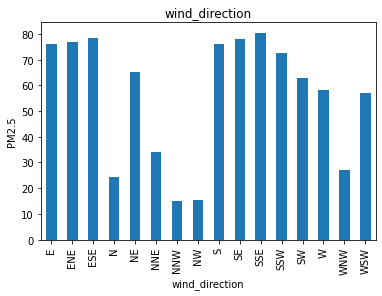

In [67]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['PM2.5'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PM2.5')
    plt.title(feature)
    plt.show()

In [68]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['PM2.5'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

C:\Users\RAVIKU~1\AppData\Local\Temp/ipykernel_6208/1741133892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature]=dataset[feature].map(labels_ordered)


In [87]:
dataset.head(90)

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013.0,3.0,1.0,2.000000,7.0,-1.1,1023.5,0.0,1,5.6
3,2013.0,3.0,1.0,3.000000,6.0,-1.4,1024.5,0.0,0,3.1
4,2013.0,3.0,1.0,4.000000,3.0,-2.0,1025.2,0.0,3,2.0
5,2013.0,3.0,1.0,11.288429,5.0,-2.2,1025.6,0.0,3,3.7
6,2013.0,3.0,1.0,6.000000,3.0,-2.6,1026.5,0.0,4,2.5
...,...,...,...,...,...,...,...,...,...,...
87,2013.0,3.0,4.0,15.000000,10.0,15.3,1016.3,0.0,8,2.4
88,2013.0,3.0,4.0,16.000000,14.0,14.5,1015.7,0.0,9,2.6
89,2013.0,3.0,4.0,17.000000,20.0,12.7,1015.9,0.0,7,2.6
90,2013.0,3.0,4.0,18.000000,25.0,11.6,1016.5,0.0,8,3.4


**Splitting The Data In Test and Train**

In [70]:
X=dataset.drop(['PM2.5'],axis=1)
y=dataset['PM2.5']

**Training The Data Using Sci-Kit Library**

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [72]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred=ml.predict(X_test)
y_pred

array([ 98.12774383,  63.03065702,  67.45150694, ...,  87.51348974,
        77.99147971, 128.21516553])

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.13096597357650752

Text(0.5, 1.0, 'Actual vs Predicted')

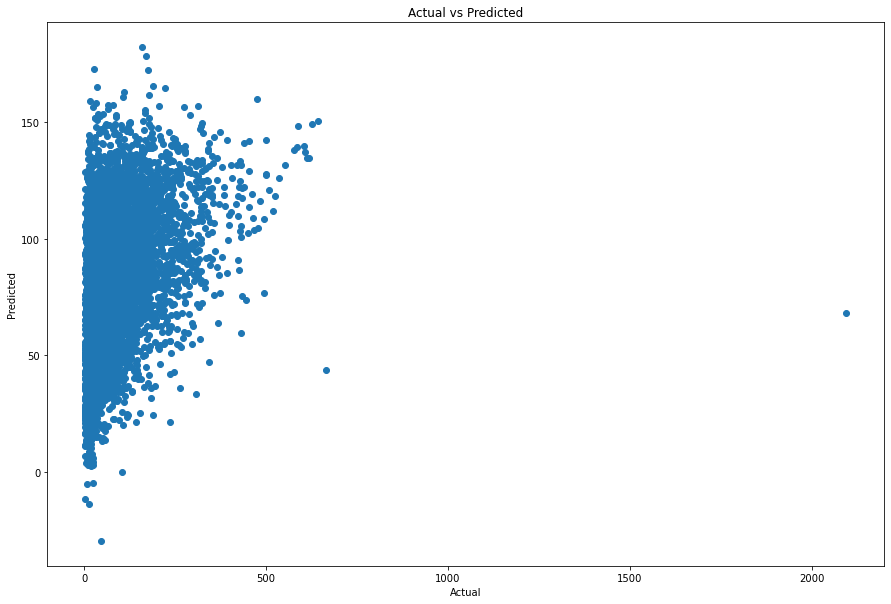

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [76]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
12285,194.0,98.127744,95.872256
4424,30.0,63.030657,-33.030657
28122,76.0,67.451507,8.548493
15745,36.0,50.967298,-14.967298
14361,8.0,94.392320,-86.392320
15830,7.0,94.977742,-87.977742
16366,164.0,117.404896,46.595104
22423,50.0,95.231146,-45.231146
28582,101.0,57.176566,43.823434
14212,219.0,99.631057,119.368943
